In [16]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(14)

from qpsk import *
from sim_functions import *
from combiner import *

In [17]:
num_points = 4
num_symbols = 100
seeds = 1000
ch_std = 2

siso, mimo2, mimo4, mimo6, mimo8 = 1, 2, 4, 6, 8

# Generate QPSK constellation
qpsk_constellation = gen_constellation(num_points)
# Generate symbols
symbols = gen_symbols(num_symbols, qpsk_constellation)
# Channel coefficients
channel = get_channel(ch_std, num_symbols, mimo8)

In [22]:
snr_values = np.linspace(0, 20, 11)
ser_values1 = np.zeros(snr_values.shape[0])
ser_values2 = np.zeros(snr_values.shape[0])
ser_values4 = np.zeros(snr_values.shape[0])
ser_values6 = np.zeros(snr_values.shape[0])
ser_values8 = np.zeros(snr_values.shape[0])


for snr in range(snr_values.shape[0]):

    # Noise standard deviation is the noise power for the snr
    n_std = 1 / db2lin(snr_values[snr])

    total_ser1 = 0
    total_ser2 = 0
    total_ser4 = 0
    total_ser6 = 0
    total_ser8 = 0
    
    for seed in range(seeds): 

        # Received symbols after adding channel and noise 
        r_symbols1 = add_channel(symbols, channel[0], n_std, siso)
        r_symbols2 = add_channel(symbols, channel[0:2, :], n_std, mimo2)
        r_symbols4 = add_channel(symbols, channel[0:4, :], n_std, mimo4)
        r_symbols6 = add_channel(symbols, channel[0:6, :], n_std, mimo6)
        r_symbols8 = add_channel(symbols, channel[0:8, :], n_std, mimo8)
        
        combiner2 = selection_combiner(r_symbols2, channel[0:2, :])
        combiner4 = selection_combiner(r_symbols4, channel[0:4, :])
        combiner6 = selection_combiner(r_symbols6, channel[0:6, :])
        combiner8 = selection_combiner(r_symbols8, channel[0:8, :])
        
        # Boolean array with wheter the received symbol is equal or not the transmitted one
        modulation = mod_compare(qpsk_constellation, symbols, r_symbols1)
        modulation2 = mod_compare(qpsk_constellation, symbols, combiner2)
        modulation4 = mod_compare(qpsk_constellation, symbols, combiner4)
        modulation6 = mod_compare(qpsk_constellation, symbols, combiner6)
        modulation8 = mod_compare(qpsk_constellation, symbols, combiner8)
        
        # Calculate the symbol error rate
        total_ser1 += symbol_error_rate(modulation)
        total_ser2 += symbol_error_rate(modulation2)
        total_ser4 += symbol_error_rate(modulation4)
        total_ser6 += symbol_error_rate(modulation6)
        total_ser8 += symbol_error_rate(modulation8)
        
    ser_values1[snr] = total_ser1 / seeds
    ser_values2[snr] = total_ser2 / seeds
    ser_values4[snr] = total_ser4 / seeds
    ser_values6[snr] = total_ser6 / seeds
    ser_values8[snr] = total_ser8 / seeds

    seeds += 200

Text(0, 0.5, 'SER')

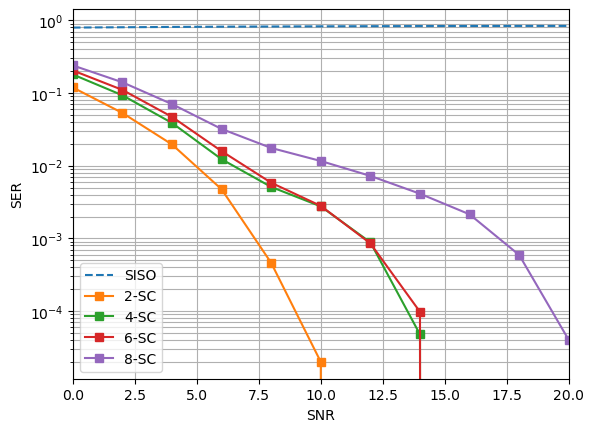

In [23]:
fig, ax = plt.subplots()
ax.plot(snr_values, ser_values1, '--',label='SISO')
ax.plot(snr_values, ser_values2, 's-', label='2-SC')
ax.plot(snr_values, ser_values4, 's-', label='4-SC')
ax.plot(snr_values, ser_values6, 's-', label='6-SC')
ax.plot(snr_values, ser_values8, 's-', label='8-SC')

plt.yscale('log')

ax.legend()
ax.grid(True, which='both')
ax.set_xlim([0, 20])
ax.set_xlabel('SNR')
ax.set_ylabel('SER')

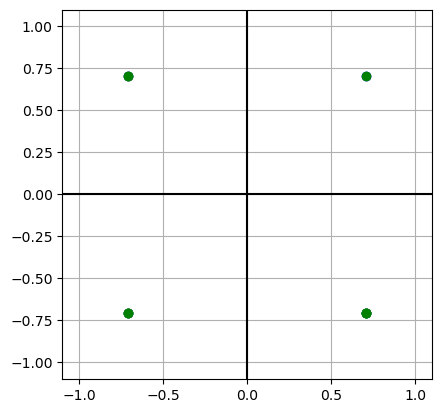

In [3]:
# fig, ax = plt.subplots()
# ax.plot(np.real(qpsk_constellation), np.imag(qpsk_constellation), 'bo')
# ax.plot(np.real(modulation[0]), np.imag(modulation[0]), 'go')
# ax.grid(True, which='both')

# ax.set_aspect('equal')
# ax.set_xlim([-1.1, 1.1])
# ax.set_ylim([-1.1, 1.1])

# ax.axhline(y=0, color='k')
# ax.axvline(x=0, color='k')